## Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
# PATH = "data/bulldozers/"

In [4]:
# !ls {PATH}

# Introduction to *Blue Book for Bulldozers*

## The data

### Look at the data

https://www.kaggle.com/c/bluebook-for-bulldozers/data) 

- **Train.csv** is the training set, which contains data through the end of 2011.
- **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012. 

- **Test.csv** is the test set, which won't be released until the last week of the competition.

The key fields are in train.csv are:

- SalesID: the unique identifier of the sale
- MachineID: the unique identifier of a machine.  A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)
- saledate: the date of the sale

In [5]:
#! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/3316/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1553443517&Signature=aUQnZuv64DwkCtrMyCjG2ZoTvPPkvsU%2Fm9tpaBSKUTQhA5Iu6O4%2Fsy2fOm0CV2CvVngWPZFGTWy4YE5ZG1w%2BwmcD0kLSPfjWMp8ntj05cYr1sUTdPacoUP3dmWZZKS%2BAxCLgrFDYIhshzyX9LWodF17y4iEkX1qE%2FH7PIc9svoZLJF0cXYpIgt8N4FY3GaI68zUPJ3w6zq%2B%2FZsDHJyVe%2FXHc2jv2WkhhMtTm4skH1PYNFaqb0oLIoAIU5RPP25o9iXWHQwvq85sb3vFae6jJD9alPjCHr4uxh0w%2BqF4n1jzxAGXHP20voko0ozKJ1rHN1oy003xrw25uIlOvtt%2F9PQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dbluebook-for-bulldozers.zip" -O "bluebook-for-bulldozers.zip" -c

In [6]:
import os
os.getcwd() 

'/home/paperspace/fastai/FastAI_2018/fastai-master/courses/ml1'

In [11]:
zio_loc = '/home/paperspace/fastai/FastAI_2018/fastai-master/courses/ml1/data/'
#import zipfile
#zip_ref = zipfile.ZipFile(zio_loc+'bluebook-for-bulldozers.zip', 'r')
#zip_ref.extractall(zio_loc)
#zip_ref.close()

In [12]:
#zio_loc = '/home/paperspace/fastai/FastAI_2018/fastai-master/courses/ml1/data/'
#import zipfile
#zip_ref = zipfile.ZipFile(zio_loc+'Train.zip', 'r')
#zip_ref.extractall(zio_loc)
#zip_ref.close()

- parse_dates — A list of any columns that contain dates
- low_memory=False — Forces it to read more of the file to decide what the types are.

In [13]:
PATH =zio_loc

In [14]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column.

In any sort of data science work, it's **important to look at your data**, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

In [15]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [16]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [17]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The variable we want to predict is called Dependent Variable in this case our dependent variable is SalePrice

It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [18]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

### Initial processing

- RandomForestRegressor — regressor is a method for predicting continuous variables (i.e. regression)
- RandomForestClassifier — classifier is a method for predicting categorical variables (i.e. classification)

In [19]:
m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Low'

This dataset contains a mix of **continuous** and **categorical** variables.

The following ***add_datepart*** method extracts particular date fields from a complete datetime for the purpose of constructing categoricals.  You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

In [20]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

Fast.ai provides a function called **train_cats** which creates categorical variables for everything that is a String. Behind the scenes, it creates a column that is an integer and it is going to store a mapping from the integers to the strings. train_cats is called “train” because it is training data specific. It is important that validation and test sets will use the same category mappings (in other words, if you used 1 for “high” for a training dataset, then 1 should also be for “high” in validation and test datasets). For validation and test dataset, use **apply_cats** instead.

In [21]:
train_cats(df_raw)

We can specify the order to use for categorical variables if we wish:

- df_raw.UsageBand.cat — Similar tofld.dt.year , .cat gives you access to things assuming something is a category.
- The order does not matter too much, but since we are going to be creating a decision tree that split things at a single point (i.e. High vs. Low and Medium , High and Low vs. Medium ) which is a little bit weird. To order them in a sensible manner, you can do the following:

In [22]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [23]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [24]:
df_raw.UsageBand.head()

0       Low
1       Low
2      High
3      High
4    Medium
Name: UsageBand, dtype: category
Categories (3, object): [High < Medium < Low]

inplace will ask Pandas to change the existing dataframe rather than returning a new one.

In [25]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [26]:
df_raw.UsageBand.head()

0    2
1    2
2    0
3    0
4    1
Name: UsageBand, dtype: int8

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [27]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

The above will add a number of empty values for each series, we sort them by the index (pandas.Series.sort_index), and divide by a number of dataset.

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

This is by far the fastest way to save something, and also to read it back. Feather format is becoming standard in not only Pandas but in Java, Apache Spark, etc.

In [28]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

### Pre-processing

In the future we can simply read it from this fast format.

In [29]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [30]:
df, y, nas = proc_df(df_raw, 'SalePrice')

- df — data frame
- y_fld — name of the dependent variable
- It makes a copy of the data frame, grab the dependent variable values (y_fld), and drop the dependent variable from the data frame.
- Then it will fix_missing (see below)
- For numeric data type, first we check if there is null column. If so, it will create a new column with a name with _na appended at the end and set it to 1 if it is missing; 0 otherwise (boolean). It will then replace the missing value with a median.
- We do not need to do this for categorical variables because Pandas handles them automatically by setting them to -1 .
- We then will go through the data frame and call numericalize (see below).
dummies — There are columns with a small number of possible values, you can put into dummies instead of numericalizing them. But we will not do that for now.

We now have something we can pass to a random forest!

In [31]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9830619281249583

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). https://en.wikipedia.org/wiki/Coefficient_of_determination

Wow, an r^2 of 0.98 - that's great, right? Well, perhaps not...

Possibly **the most important idea** in machine learning is that of having separate training & validation data sets. As motivation, suppose you don't divide up your data, but instead use all of it.  And suppose you have lots of parameters:

<img src="images/overfitting2.png" alt="" style="width: 70%"/>
<center>
[Underfitting and Overfitting](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted)
</center>

The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it's not the best choice.  Why is that?  If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.

This illustrates how using all our data can lead to **overfitting**. A validation set helps diagnose this problem.

If your dataset has a time piece in it, you would likely want to predict future prices/values/etc. What Kaggle did was to give us data representing a particular date range in the training set, and then the test set presented a future set of dates that wasn’t represented in the training set. So we need to create a validation set that has the same properties:

In [32]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

# Random Forests

## Base model

Let's try our model again, this time with separate training and validation sets.

In [33]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [34]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 5s, sys: 420 ms, total: 1min 6s
Wall time: 13.5 s
[0.09074631028796716, 0.24884131929710498, 0.9827895281338621, 0.8894158295564418]


An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

## Speeding things up

One way to speed things up is to pass in the subset parameter to proc_df which will randomly sample the data:

In [35]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

As you see above, when calling split_vals, we do not put the result to a validation set. _ indicates that we are throwing away the return value. We want to keep validation set the same all the time.

In [36]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.15 s, sys: 4 ms, total: 3.15 s
Wall time: 589 ms
[0.11306419532261713, 0.3765316913629042, 0.9716785390713437, 0.7468073791633352]


## Single tree

In [37]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5204679824239656, 0.5814138628602504, 0.3998587255921857, 0.3963033871349077]


- n_estimators=1 — create a forest with just one tree
- max_depth=3 — to make it a small tree
- bootstrap=False — random forest randomizes bunch of things, we want to turn that off by this parameter

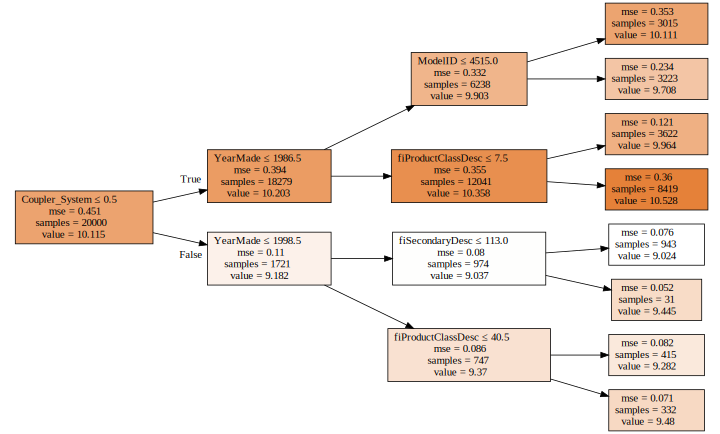

In [38]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [43]:
# ! sudo apt-get install graphviz  

E: Command line option --y is not understood in combination with the other options


Let's see what happens if we create a bigger tree.

In [39]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[6.153480596427405e-17, 0.5073778763605351, 1.0, 0.5402613388458812]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results.

- The key insight here is to construct multiple models which are better than nothing and where the errors are, as much as possible, not correlated with each other.
- The number of trees to use is the first of our hyper parameters we are going to tune to achieve higher metric.

## Bagging

### Intro to bagging

To learn about bagging in random forests, let's start with our basic model again.

In [40]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11222328312890602, 0.3726193900689356, 0.9720982527892947, 0.7520415715092493]


We'll grab the predictions for each individual tree, and look at one example.

In [41]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([9.13238, 8.9872 , 9.10498, 8.9872 , 9.39266, 8.9872 , 8.9872 , 8.95545, 9.10498, 9.5819 ]),
 9.122113980531726,
 9.104979856318357)

In [42]:
preds.shape

(10, 12000)

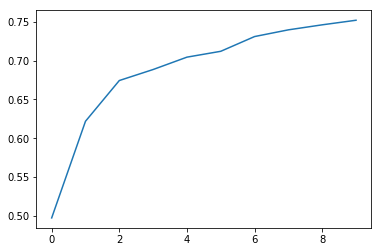

In [43]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [44]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10294879335821724, 0.359422495729753, 0.9765194653711482, 0.7692942148616536]


In [45]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09739192686397016, 0.35763967593447393, 0.9789858718542281, 0.7715772480960954]


In [46]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09457788866318914, 0.3549634195282497, 0.9801826906360501, 0.7749830814823756]


### Out-of-bag (OOB) score

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called *out-of-bag (OOB) error* which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

In [47]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09736763954267749, 0.35630207174013145, 0.9789963514342146, 0.7732826956714218, 0.8506636241467711]


This shows that our validation set time difference is making an impact, as is model over-fitting.

## Reducing over-fitting

### Subsampling

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: *subsampling*. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

Earlier, we took 30,000 rows and created all the models which used a different subset of that 30,000 rows. Why not take a totally different subset of 30,000 each time? In other words, let’s leave the entire 389,125 records as is, and if we want to make things faster, pick a different subset of 30,000 each time. So rather than bootstrapping the entire set of rows, just randomly sample a subset of the data.

In [48]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a *different* random subset per tree. That way, given enough trees, the model can still see *all* the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [49]:
set_rf_samples(20000)

In [50]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 20.7 s, sys: 740 ms, total: 21.4 s
Wall time: 4.65 s
[0.24078893082567546, 0.27672230659135505, 0.8788264412860953, 0.8632471732869087, 0.8663626130192352]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful.

In [51]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22691817809008627, 0.26209597890076375, 0.8923848532966849, 0.8773214342316595, 0.8808603529752568]


### Tree building parameters

We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

So OOB score needs to be turned off when using set_rf_samples as they are not compatible. reset_rf_samples() will turn it back to the way it was.

In [52]:
reset_rf_samples()

Let's get a baseline for this full set to compare to.

In [53]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [56]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07835990459227112, 0.23656793196841144, 0.9871671646194967, 0.900055311043642, 0.9084842742775495]


In [57]:
t=m.estimators_[0].tree_

In [58]:
dectree_max_depth(t)

44

- min_sample_leaf=3 :
- Stop training the tree further when a leaf node has 3 or less samples (before we were going all the way down to 1). This means there will be one or two less levels of decision being made which means there are half the number of actual decision criteria we have to train (i.e. faster training time).
- For each tree, rather than just taking one point, we are taking the average of at least three points that we would expect the each tree to generalize better. But each tree is going to be slightly less powerful on its own.
- The numbers that work well are 1, 3, 5, 10, 25, but it is relative to your overall dataset size.
- By using 3 instead of 1, validation R² improved from 0.89 to 0.90

In [59]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1405893652418526, 0.23412725205327312, 0.9586914675467482, 0.9021069387530531, 0.9070821194777346]


In [60]:
t=m.estimators_[0].tree_

In [61]:
dectree_max_depth(t)

38

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [62]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11512725321489296, 0.23427884865203671, 0.972299276502883, 0.9019801268633245, 0.9085402472297455]


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

- None
- 0.5
- 'sqrt'

- 1, 3, 5, 10, 25, 100

In [63]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11912648506257031, 0.22815528522781725, 0.9703413429968223, 0.9070372331071493, 0.9117944851622037]


We can't compare our results directly with the Kaggle competition, since it used a different validation set (and we can no longer to submit to this competition) - but we can at least see that we're getting similar results to the winners based on the dataset we have.

The sklearn docs [show an example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) of different `max_features` methods with increasing numbers of trees - as you see, using a subset of features on each split requires using more trees, but results in better models:
![sklearn max_features chart](http://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png)